In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.model_selection as skl_ms
import seaborn as sns
import cv2
import statistics
from PIL import Image
import scipy.fft
import skimage.metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

import os
import warnings
import logging

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Applied AI/train.zip" -d "/content/train/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/P/P03803_1.jpeg  
  inflating: /content/train/P/P03803_2.jpeg  
  inflating: /content/train/P/P03804_1.jpeg  
  inflating: /content/train/P/P03809_1.jpeg  
  inflating: /content/train/P/P03809_2.jpeg  
  inflating: /content/train/P/P03811_1.jpeg  
  inflating: /content/train/P/P03811_2.jpeg  
  inflating: /content/train/P/P03813_1.jpeg  
  inflating: /content/train/P/P03814_1.jpeg  
  inflating: /content/train/P/P03814_2.jpeg  
  inflating: /content/train/P/P03815_1.jpeg  
  inflating: /content/train/P/P03817_1.jpeg  
  inflating: /content/train/P/P03817_2.jpeg  
  inflating: /content/train/P/P03821_1.jpeg  
  inflating: /content/train/P/P03821_2.jpeg  
  inflating: /content/train/P/P03828_1.jpeg  
  inflating: /content/train/P/P03828_2.jpeg  
  inflating: /content/train/P/P03830_1.jpeg  
  inflating: /content/train/P/P03831_1.jpeg  
  inflating: /content/train/P/P03838_1.jpeg  
  inflating: /content/train/P

In [ ]:
original_csv = pd.read_csv('/content/train/labels_train.csv')

In [ ]:
# List of Normal images
root_dir = '/content/train/'
n = [] #9354
n_patient_id = []
for dirname, _, filenames in os.walk(os.path.join(root_dir, 'N')):
    for filename in filenames:
            n.append(os.path.join(dirname, filename))
            n_patient_id.append(os.path.join(filename[:-4]))


In [ ]:
# List of Pneumonia images
p = [] #4250
p_patient_id = []
for dirname, _, filenames in os.walk(os.path.join(root_dir, 'P')):
    for filename in filenames:
        p.append(os.path.join(dirname, filename))
        p_patient_id.append(os.path.join(filename[:-4]))

In [ ]:
# List of Tuberculosis images 
t = [] #1866
t_patient_id = []
for dirname, _, filenames in os.walk(os.path.join(root_dir, 'T')):
    for filename in filenames:
        t.append(os.path.join(dirname, filename))
        t_patient_id.append(os.path.join(filename[:-4]))

In [ ]:
# Compute Laplacian variance values of Normal images
list_lap_var_n=[]
for address in n:
    temp = cv2.imread(address, cv2.IMREAD_GRAYSCALE)
    lap_var_n = cv2.Laplacian(temp, cv2.CV_64F).var()
    list_lap_var_n.append(lap_var_n)
    

In [ ]:
# Compute Laplacian variance values of Pneumonia images
list_lap_var_p=[]
for address in p:
    temp = cv2.imread(address, cv2.IMREAD_GRAYSCALE)
    lap_var_p = cv2.Laplacian(temp, cv2.CV_64F).var()
    list_lap_var_p.append(lap_var_p)

In [ ]:
# Compute Laplacian variance values of Tuberculosis images
list_lap_var_t=[]
for address in t:
    temp = cv2.imread(address, cv2.IMREAD_GRAYSCALE)
    lap_var_t = cv2.Laplacian(temp, cv2.CV_64F).var()
    list_lap_var_t.append(lap_var_t)

max laplacian Variance N:  199727.0094150468
min laplacian Variance N:  0.6460015222394244
mean laplacian Variance N:  16687.325316430135
mode laplacian Variance N:  3.646396804843749


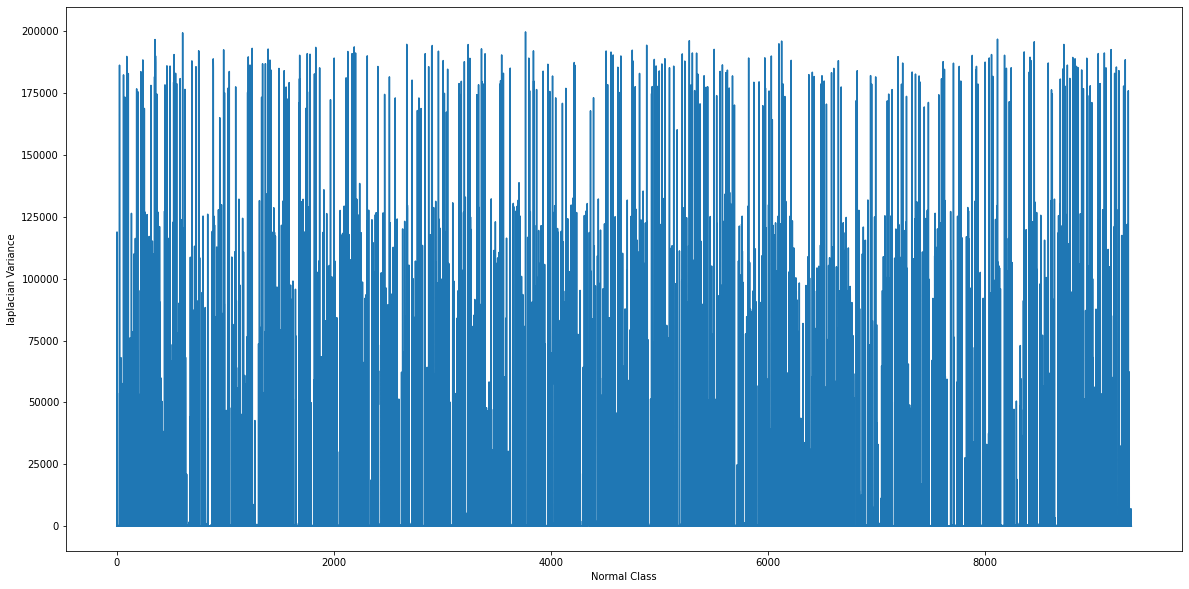

In [ ]:
# Plot laplacian variance values of Normal images

plt.figure(figsize = (20,10));
plt.plot(list_lap_var_n)
plt.xlabel("Normal Class")
plt.ylabel("laplacian Variance")

print("max laplacian Variance N: ",max(list_lap_var_n))
print("min laplacian Variance N: ",min(list_lap_var_n))
print("mean laplacian Variance N: ",sum(list_lap_var_n)/len(list_lap_var_n))
print("mode laplacian Variance N: ",statistics.mode(list_lap_var_n))

Text(0.5, 0, 'Normal Class')

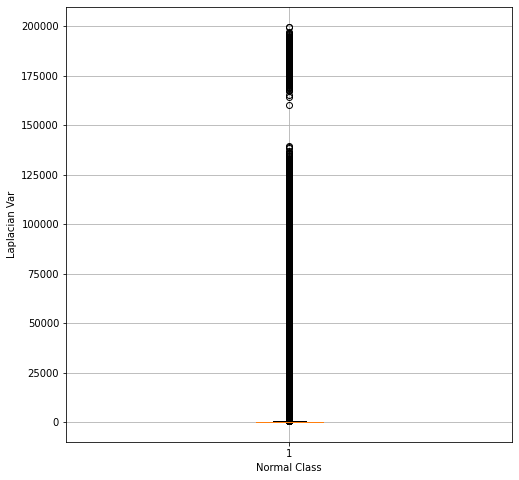

In [ ]:
# Box plot of laplacian variance values of Normal images

fig = plt.figure(figsize=(8,8));

plt.boxplot(list_lap_var_n);
plt.grid(visible=True);
#plt.ylim([0,7]);
plt.ylabel('Laplacian Var')
plt.xlabel('Normal Class')

max laplacian Variance P:  71987.23645541372
min laplacian Variance P:  0.9246182441327164
mean laplacian Variance P:  487.37726653308994
mode laplacian Variance P:  261.531798499375


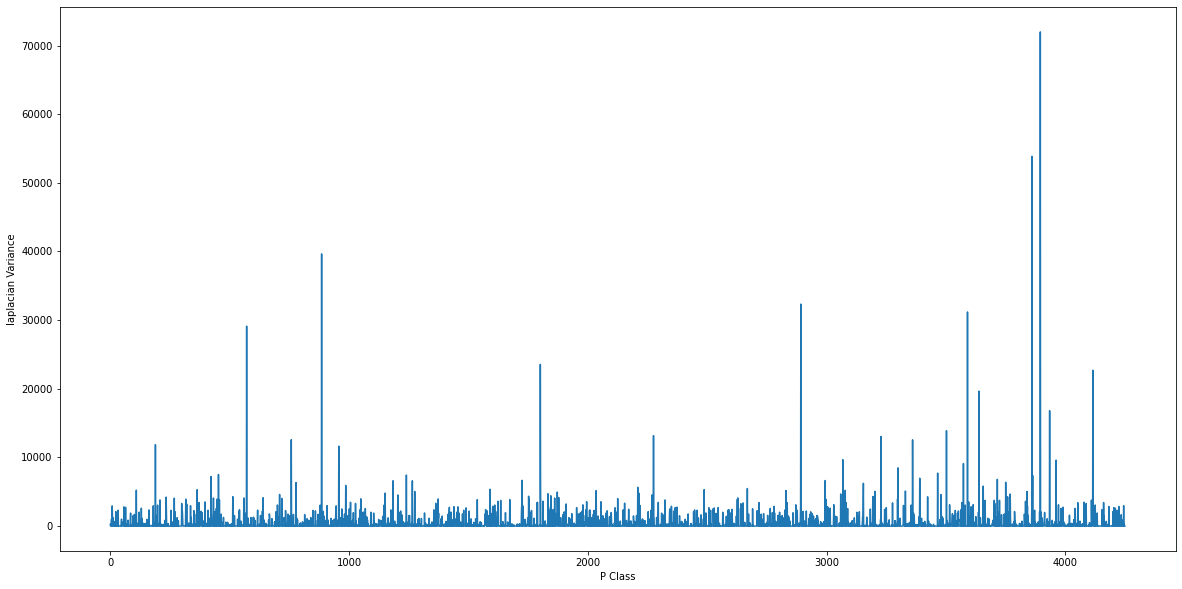

In [ ]:
# Plot laplacian variance values of Pneumonia images

plt.figure(figsize = (20,10));
plt.plot(list_lap_var_p)
plt.xlabel("P Class")
plt.ylabel("laplacian Variance")

print("max laplacian Variance P: ",max(list_lap_var_p))
print("min laplacian Variance P: ",min(list_lap_var_p))
print("mean laplacian Variance P: ",sum(list_lap_var_p)/len(list_lap_var_p))
print("mode laplacian Variance P: ",statistics.mode(list_lap_var_p))

Text(0.5, 0, 'P Class')

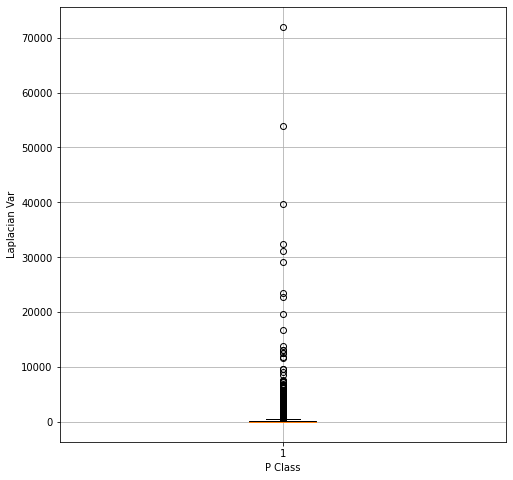

In [ ]:
# Box plot of laplacian variance values of Pneumonia images

fig = plt.figure(figsize=(8,8));

plt.boxplot(list_lap_var_p);
plt.grid(visible=True);
#plt.ylim([0,7]);
plt.ylabel('Laplacian Var')
plt.xlabel('P Class')

max laplacian Variance T:  199974.62628066735
min laplacian Variance T:  0.7572721591043357
mean laplacian Variance T:  18283.445113341186
mode laplacian Variance T:  2.2431160521948894


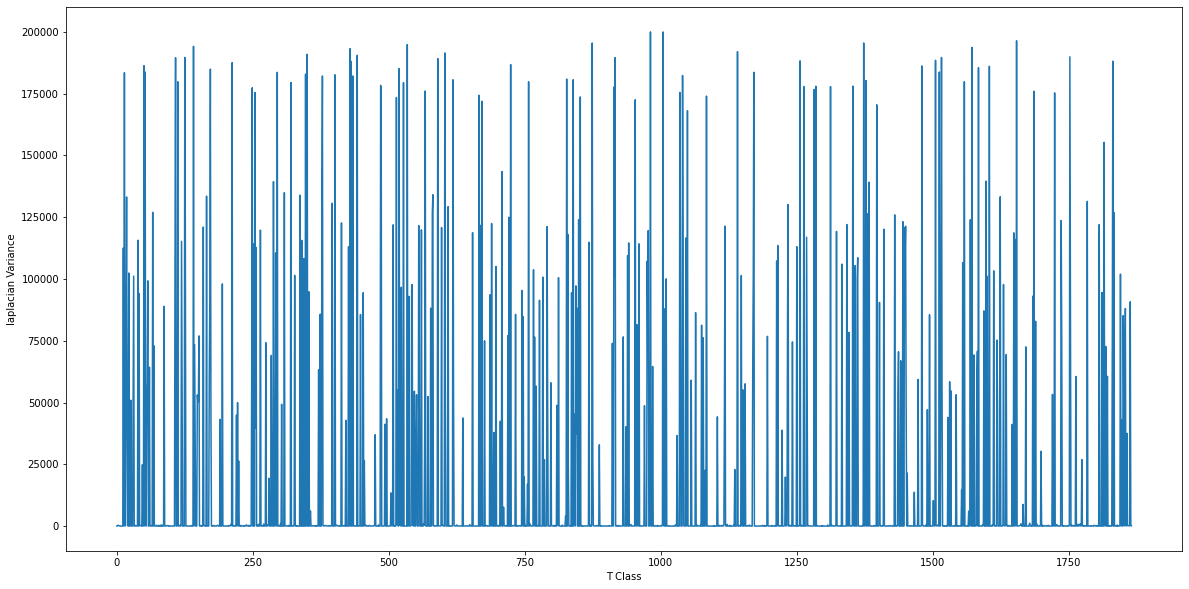

In [ ]:
# Plot laplacian variance values of Tuberculosis images

plt.figure(figsize = (20,10));
plt.plot(list_lap_var_t)
plt.xlabel("T Class")
plt.ylabel("laplacian Variance")

print("max laplacian Variance T: ",max(list_lap_var_t))
print("min laplacian Variance T: ",min(list_lap_var_t))
print("mean laplacian Variance T: ",sum(list_lap_var_t)/len(list_lap_var_t))
print("mode laplacian Variance T: ",statistics.mode(list_lap_var_t))

Text(0.5, 0, 'T Class')

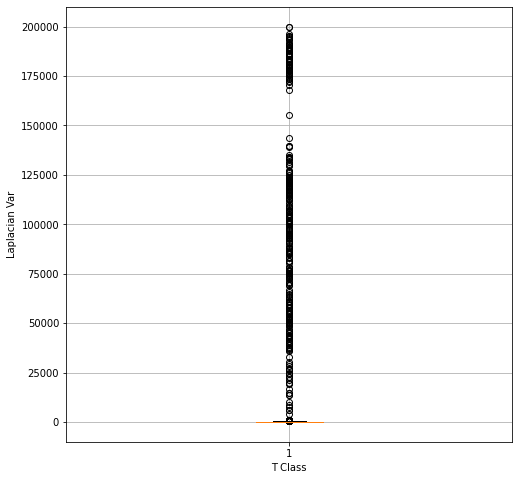

In [ ]:
# Box plot laplacian variance values of Tuberculosis images

fig = plt.figure(figsize=(8,8));

plt.boxplot(list_lap_var_t);
plt.grid(visible=True);
#plt.ylim([0,7]);
plt.ylabel('Laplacian Var')
plt.xlabel('T Class')

In [ ]:
laplacian_variances = list_lap_var_n + list_lap_var_p + list_lap_var_t
laplacian_variances = np.array(laplacian_variances)

max laplacian Variance:  199974.62628066735
min laplacian Variance:  0.6460015222394244
mean laplacian Variance:  12429.314995096762
mode laplacian Variance:  3.646396804843749


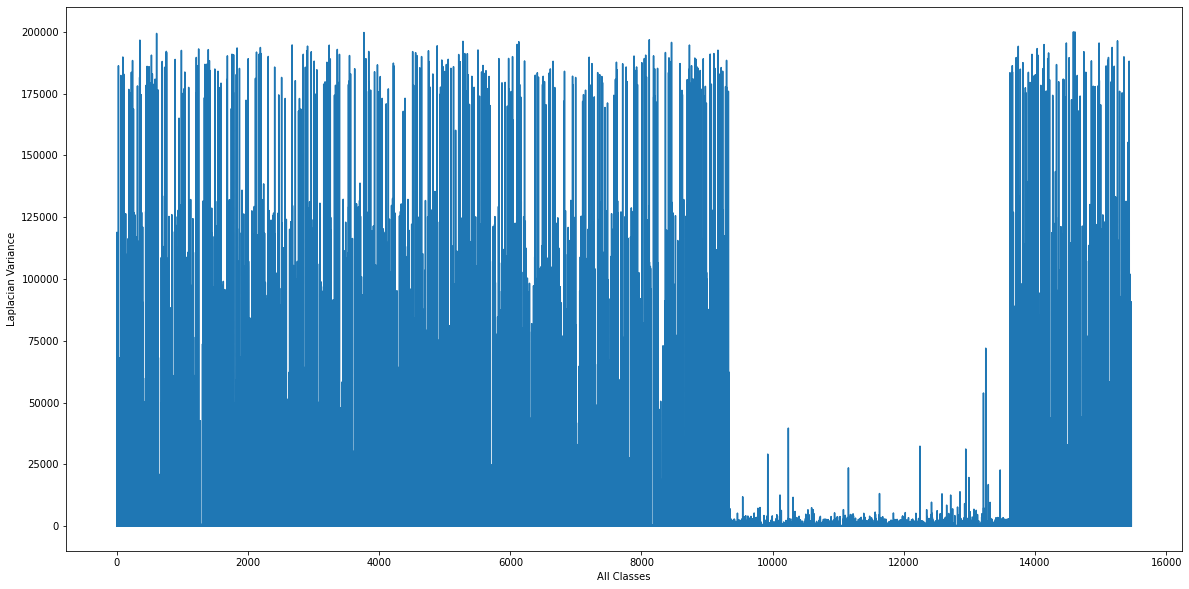

In [ ]:
# Plot laplacian variance values of all classes
plt.figure(figsize = (20,10));
plt.plot(laplacian_variances)
plt.xlabel("All Classes")
plt.ylabel("Laplacian Variance")

print("max laplacian Variance: ",max(laplacian_variances))
print("min laplacian Variance: ",min(laplacian_variances))
print("mean laplacian Variance: ",sum(laplacian_variances)/len(laplacian_variances))
print("mode laplacian Variance: ",statistics.mode(laplacian_variances))

Text(0.5, 0, 'All Classes')

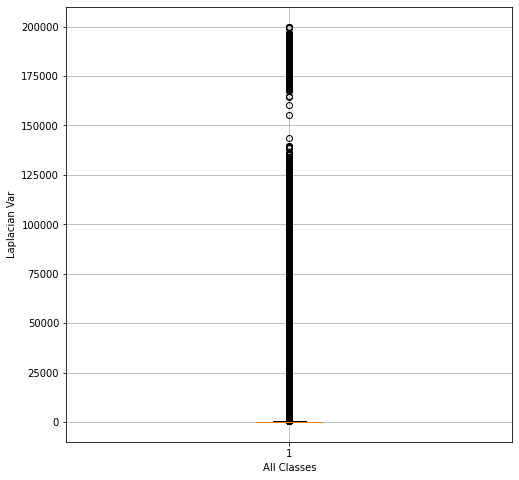

In [ ]:
# Box plot laplacian variance values of all classes

fig = plt.figure(figsize=(8,8));

plt.boxplot(laplacian_variances);
plt.grid(visible=True);
#plt.ylim([0,7]);
plt.ylabel('Laplacian Var')
plt.xlabel('All Classes')

In [ ]:
all_imgs = n + p + t
all_imgs = np.array(all_imgs)

In [ ]:
# Percentage of images with laplacian variance values greater than 1000
np.sum(laplacian_variances > 1000) / 15400

0.16662337662337662

In [ ]:
# Images with large laplacian variance
image_tier_less = all_imgs[(laplacian_variances > 1000) & (laplacian_variances < 15000)]

In [ ]:
# Images with very large laplacian variance
image_tier_horrifying = all_imgs[laplacian_variances > 15000]

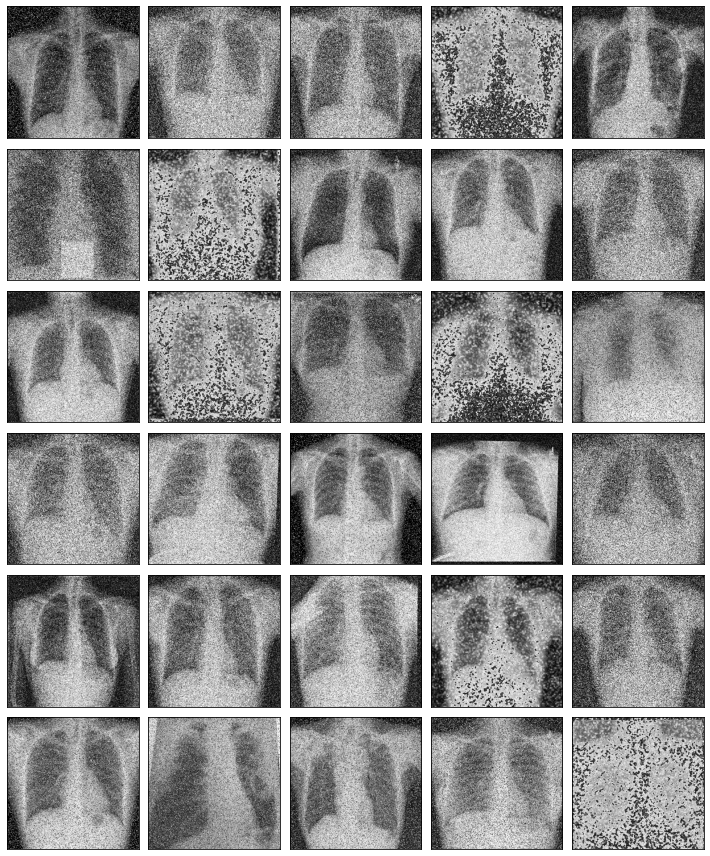

In [ ]:
# Show a sample of images with very large laplacian variance 

num_images = 30
image_paths = np.random.choice(image_tier_horrifying, size=num_images, replace=False)

# Create a 6x5 subplot grid
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(10, 12))

# Loop through each subplot and load the corresponding image
for i, axi in enumerate(ax.flat):
    # Check if we have loaded all the images
    if i < num_images:
        # Load the image from path and display it in the subplot
        img = plt.imread(image_paths[i])
        axi.imshow(img, cmap='gray')
    # Remove the axis ticks and labels from the subplot
    axi.set_xticks([])
    axi.set_yticks([])
    
# Display the subplot grid
plt.tight_layout()
plt.show()

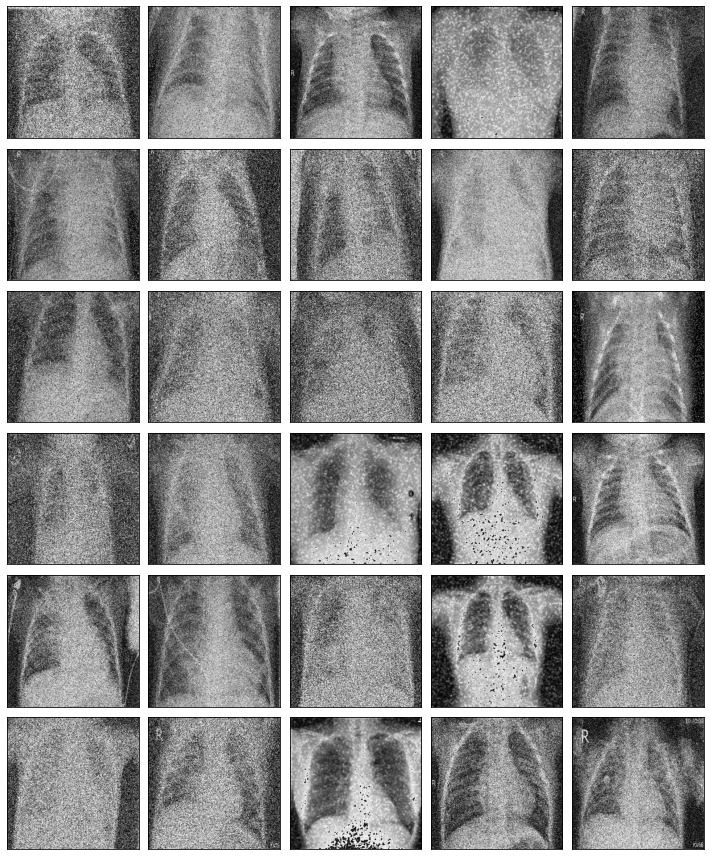

In [ ]:
# Show images with large laplacian variance

num_images = 30
image_paths = np.random.choice(image_tier_less, size=num_images, replace=False)

# Create a 6x5 subplot grid
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(10, 12))

# Loop through each subplot and load the corresponding image
for i, axi in enumerate(ax.flat):
    # Check if we have loaded all the images
    if i < num_images:
        # Load the image from path and display it in the subplot
        img = plt.imread(image_paths[i])
        axi.imshow(img, cmap='gray')
    # Remove the axis ticks and labels from the subplot
    axi.set_xticks([])
    axi.set_yticks([])
    
# Display the subplot grid
plt.tight_layout()
plt.show()

## Let's see if preprocessing can reduce the noise

In [ ]:
def preprocessing(image):
  if image.shape[-1] == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  image = np.uint8(image)

  # Check if background is Standard Radiological Format compliant, otherwise invert colors
  # (the check is performed on the median color along the spine)
  buffer = image / np.max(image)

  median_spine = np.median(buffer[:, buffer.shape[1] // 2])

  if median_spine < 0.5:
    image = cv2.bitwise_not(image)
  
  # Mist reduction and gamma transformation
  img_equalized = cv2.equalizeHist(image)
  gamma = 1.5
  inv_gamma = 1.0 / gamma
  table = np.array([((i / 255.0) ** inv_gamma) * 255
                    for i in np.arange(0, 256)]).astype('uint8')
  img_gamma = cv2.LUT(img_equalized, table)

  # Apply Adaptive Contrast Equalization
  clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8,8))
  clahe_img = clahe.apply(img_gamma)

  # Apply Gaussian Smoothing
  gaussian_img = cv2.GaussianBlur(clahe_img, (5,5), 0)

  return image

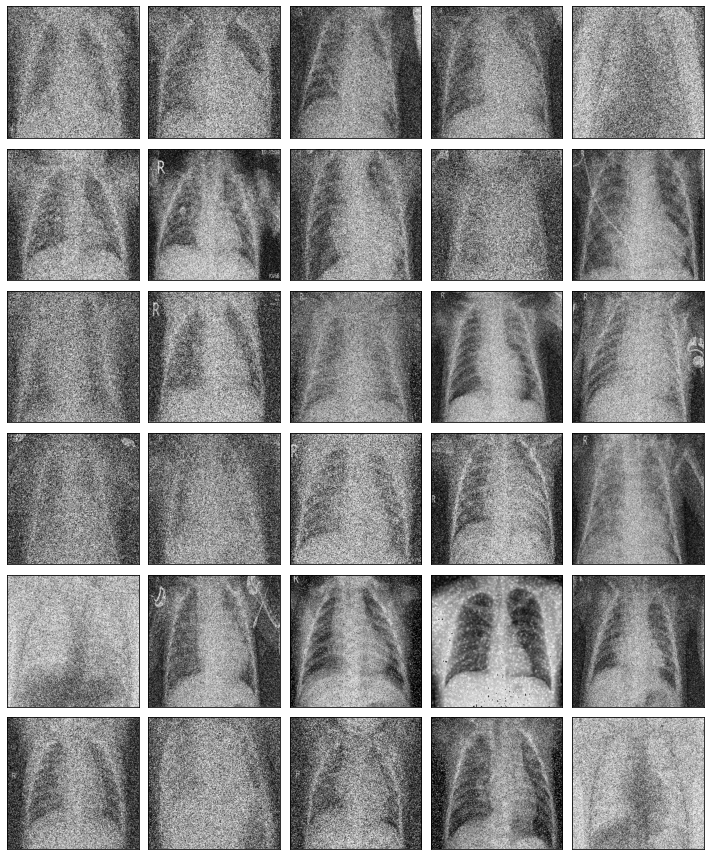

In [ ]:
# Show preprocessed images with large laplacian variance
num_images = 30
image_paths = np.random.choice(image_tier_less, size=num_images, replace=False)

# Create a 6x5 subplot grid
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(10, 12))

# Loop through each subplot and load the corresponding image
for i, axi in enumerate(ax.flat):
    # Check if we have loaded all the images
    if i < num_images:
        # Load the image from path and display it in the subplot
        img = cv2.imread(image_paths[i])
        prec = preprocessing(img)
        axi.imshow(prec, cmap='gray')
    # Remove the axis ticks and labels from the subplot
    axi.set_xticks([])
    axi.set_yticks([])
    
# Display the subplot grid
plt.tight_layout()
plt.show()

### We observed that a threshold of 1000 is appropriate to discriminate noisy images as preprocessing could not overcome the issue

In [ ]:
# Percentages of noisy images per class
noisy_n = np.sum(np.array(list_lap_var_n) > 1000)
percentage_noisy_n = noisy_n / len(list_lap_var_n) * 100.
print('There are {} normal noisy images, corresponding to {}% of the total'.format(noisy_n, percentage_noisy_n))

noisy_p = np.sum(np.array(list_lap_var_p) > 1000)
percentage_noisy_p = noisy_p / len(list_lap_var_p) * 100.
print('There are {} pneumonia noisy images, corresponding to {}% of the total'.format(noisy_p, percentage_noisy_p))

noisy_t = np.sum(np.array(list_lap_var_t) > 1000)
percentage_noisy_t = noisy_t / len(list_lap_var_t) * 100.
print('There are {} tuberculosis noisy images, corresponding to {}% of the total'.format(noisy_t, percentage_noisy_t))

There are 1668 normal noisy images, corresponding to 17.831943553559974% of the total
There are 560 pneumonia noisy images, corresponding to 13.176470588235295% of the total
There are 338 tuberculosis noisy images, corresponding to 18.113612004287248% of the total


### What a sample of average laplacian variance range  looks like:

Found 104 images within range 500-600


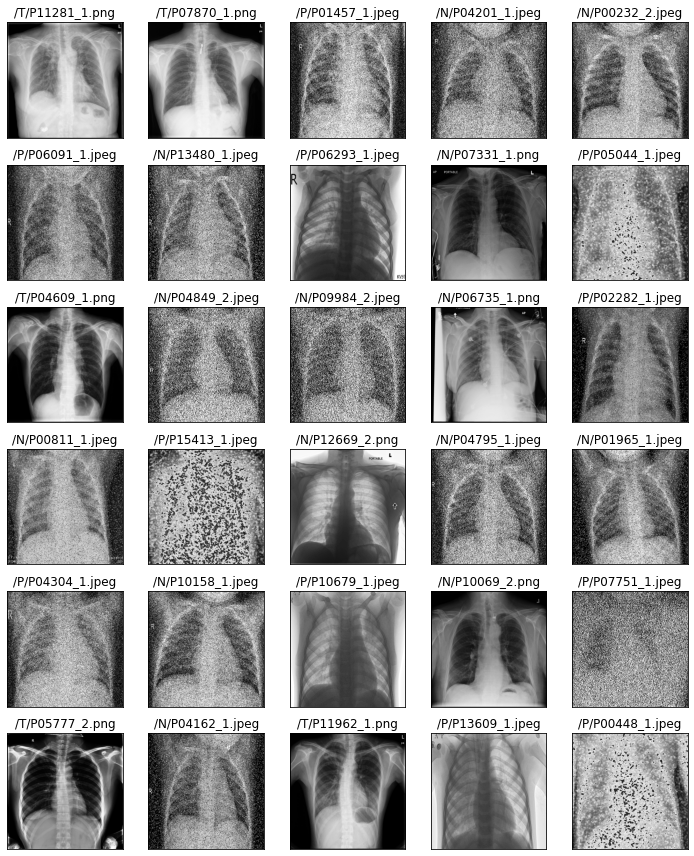

In [ ]:
lap_range = [500, 600]

image_tier_target  = all_imgs[(laplacian_variances > lap_range[0]) & (laplacian_variances < lap_range[1])]

print('Found {} images within range {}-{}'.format(image_tier_target.size, lap_range[0], lap_range[1]))

# Assuming the image paths are stored in a numpy array 'image_paths'
num_images = 30
image_paths = np.random.choice(image_tier_target, size=num_images, replace=False)

# Create a 6x5 subplot grid
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(10, 12))

# Loop through each subplot and load the corresponding image
for i, axi in enumerate(ax.flat):
    # Check if we have loaded all the images
    if i < num_images:
        # Load the image from path and display it in the subplot
        img = plt.imread(image_paths[i])
        axi.imshow(img, cmap='gray')
        axi.set_title(image_paths[i][14:])
    # Remove the axis ticks and labels from the subplot
    axi.set_xticks([])
    axi.set_yticks([])
    
# Display the subplot grid
plt.tight_layout()
plt.show()

## Conclusion
Laplacian variance filtering cannot eliminate all the noisy images as the blobby ones are not detected as noise

In [ ]:
# sampling manually the images based on how noisy the images are
blobby_ones = ['/T/P00729_1.png', '/T/P01223_1.png', '/P/P00248_1.jpeg', '/P/P00448_1.jpeg', '/P/P02336_1.jpeg', '/N/P00348_1.png', '/N/P00682_1.png', '/N/P00805_1.png']
noisy_ones = ['/T/P00107_1.png', '/T/P00102_1.png', '/T/P00147_2.png', '/P/P02237_1.jpeg', '/P/P02184_1.jpeg', '/P/P02527_1.jpeg', '/N/P00144_2.png', '/N/P00150_2.png', '/N/P00245_1.png']
good_ones = ['/N/P00001_2.png','/N/P00002_1.png','/N/P00004_1.jpeg','/N/P00037_1.png','/P/P00043_1.jpeg','/P/P00042_1.jpeg','/T/P00044_1.png', '/T/P00095_1.png','/T/P00228_1.png']

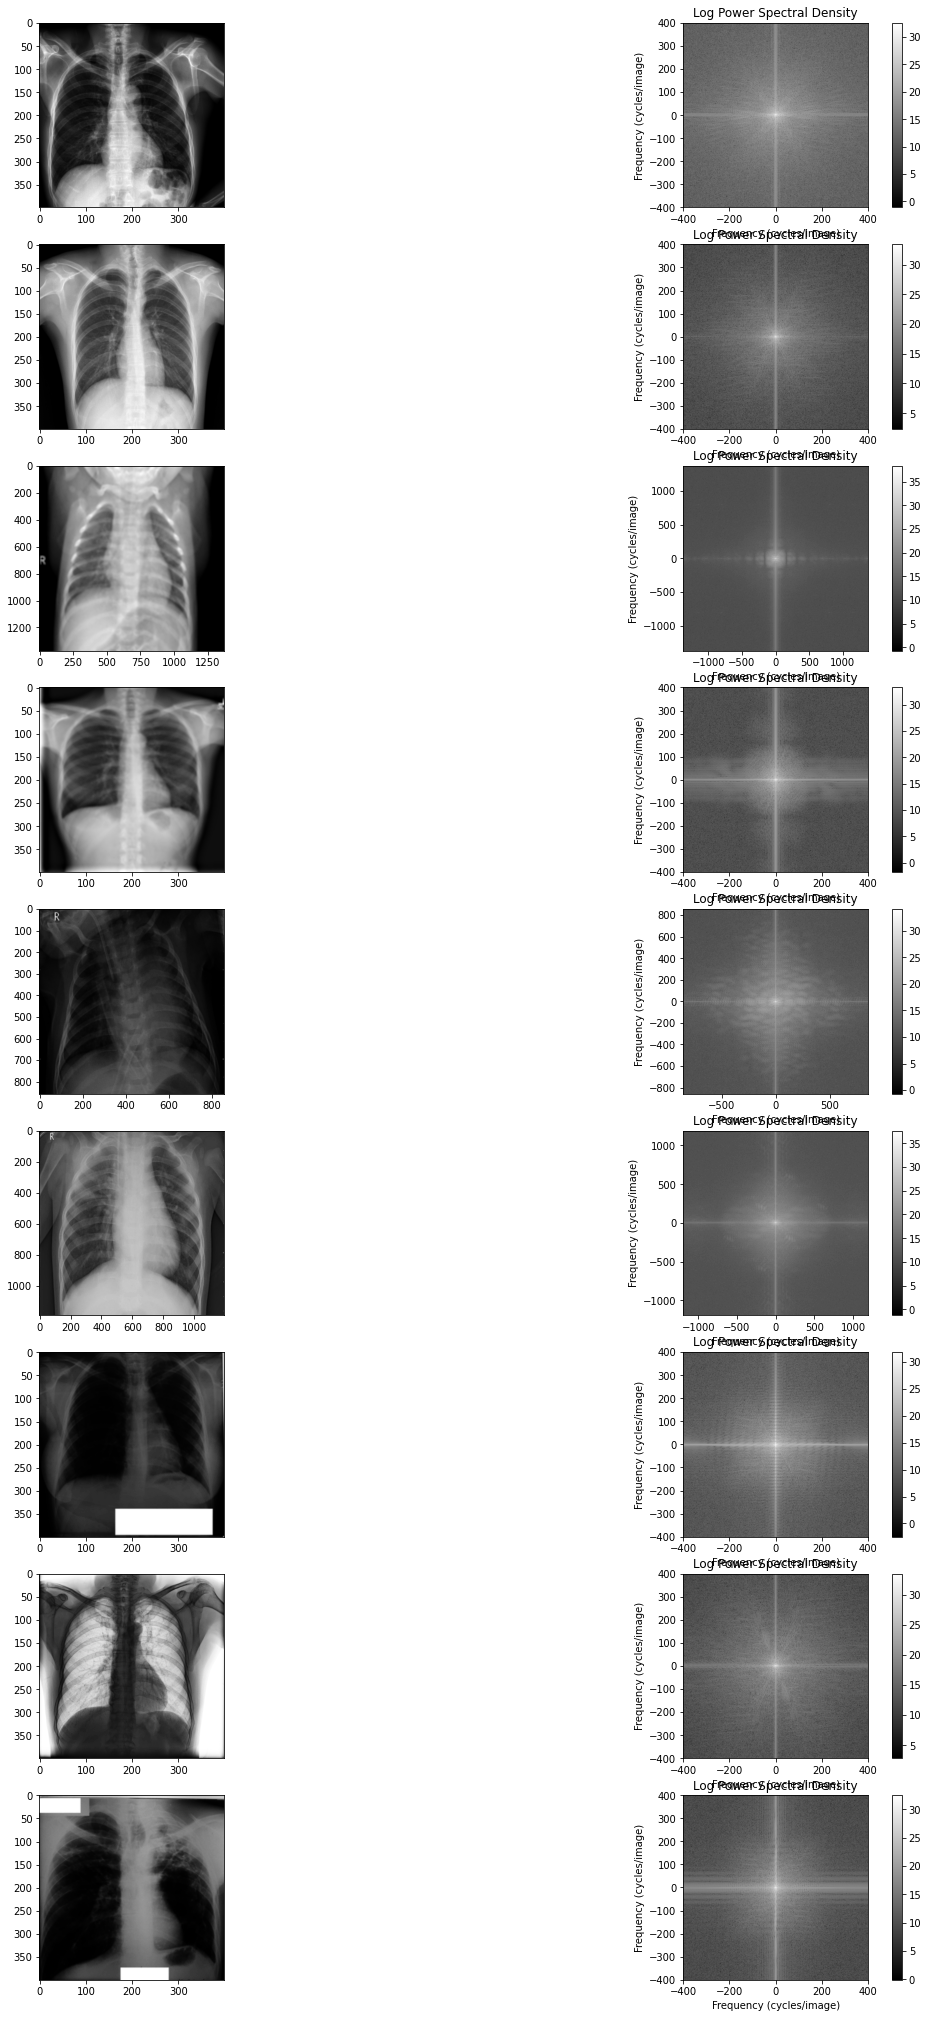

In [ ]:
# Compare visually the log power spectral density of good images to see possible similarities

current_images = good_ones

fig, axs = plt.subplots(len(current_images), 2, figsize =(2.15 * len(current_images), 4 * len(current_images)))

for i in range(len(current_images)):
  img = cv2.imread('/content/train/' + current_images[i], cv2.IMREAD_GRAYSCALE)
  axs[i,0].imshow(img, cmap='gray')

  # Compute the 2D FFT of the data
  fft_result = np.fft.fft2(img)

  # Shift the zero-frequency component to the center of the spectrum
  fft_result = np.fft.fftshift(fft_result)

  # Compute the power spectral density (PSD) of the FFT result
  psd = 2 * np.log(np.abs(fft_result))

  # Plot the PSD using imshow
  pcm = axs[i,1].imshow(psd, cmap='gray', extent=(-img.shape[0], img.shape[0], -img.shape[0], img.shape[0]))
  fig.colorbar(pcm, ax = axs[i,1])
  axs[i,1].set_title('Log Power Spectral Density')
  axs[i,1].set_xlabel('Frequency (cycles/image)')
  axs[i,1].set_ylabel('Frequency (cycles/image)')
  

In [ ]:
# compare quantitatively the statistical properties(Mean and Variance) of Blobby, noisy and good images 

powers_blobby_mean = []
powers_noisy_mean = []
powers_good_mean = []
powers_blobby_var = []
powers_noisy_var = []
powers_good_var = []

for current_image in blobby_ones:
  img = cv2.imread('/content/train/' + current_image, cv2.IMREAD_GRAYSCALE)

  # Compute the 2D FFT of the data
  fft_result = np.fft.fft2(img)

  # Shift the zero-frequency component to the center of the spectrum
  fft_result = np.fft.fftshift(fft_result)

  # Compute the power spectral density (PSD) of the FFT result
  psd = 2 * np.log(np.abs(fft_result))
  powers_blobby_mean.append(np.mean(psd))
  powers_blobby_var.append(np.var(psd))

for current_image in noisy_ones:
  img = cv2.imread('/content/train/' + current_image, cv2.IMREAD_GRAYSCALE)

  # Compute the 2D FFT of the data
  fft_result = np.fft.fft2(img)

  # Shift the zero-frequency component to the center of the spectrum
  fft_result = np.fft.fftshift(fft_result)

  # Compute the power spectral density (PSD) of the FFT result
  psd = 2 * np.log(np.abs(fft_result))
  powers_noisy_mean.append(np.mean(psd))
  powers_noisy_var.append(np.var(psd))

for current_image in good_ones:
  img = cv2.imread('/content/train/' + current_image, cv2.IMREAD_GRAYSCALE)

  # Compute the 2D FFT of the data
  fft_result = np.fft.fft2(img)

  # Shift the zero-frequency component to the center of the spectrum
  fft_result = np.fft.fftshift(fft_result)

  # Compute the power spectral density (PSD) of the FFT result
  psd = 2 * np.log(np.abs(fft_result))
  powers_good_mean.append(np.mean(psd))
  powers_good_var.append(np.var(psd))

powers_blobby_mean = np.array(powers_blobby_mean)
powers_noisy_mean = np.array(powers_noisy_mean)
powers_good_mean = np.array(powers_good_mean)
powers_blobby_var = np.array(powers_blobby_var)
powers_noisy_var = np.array(powers_noisy_var)
powers_good_var = np.array(powers_good_var)

In [ ]:
print('Blobby ones:')
print('   - mean of mean: %f' % np.mean(powers_blobby_mean))
print('   - var of mean: %f' % np.var(powers_noisy_mean))
print('   - mean of var: %f' % np.mean(powers_blobby_var))
print('   - var of var: %f\n' % np.var(powers_blobby_var))
print('Noisy ones:')
print('   - mean of mean: %f' % np.mean(powers_noisy_mean))
print('   - var of mean: %f' % np.var(powers_noisy_mean))
print('   - mean of var: %f' % np.mean(powers_noisy_var))
print('   - var of var: %f\n' % np.var(powers_noisy_var))
print('Good ones:')
print('   - mean of mean: %f' % np.mean(powers_good_mean))
print('   - var of mean: %f' % np.var(powers_good_mean))
print('   - mean of var: %f' % np.mean(powers_noisy_var))
print('   - var of var: %f\n' % np.var(powers_noisy_var))

Blobby ones:
   - mean of mean: 17.168464
   - var of mean: 2.925073
   - mean of var: 7.703521
   - var of var: 18.249102

Noisy ones:
   - mean of mean: 18.915186
   - var of mean: 2.925073
   - mean of var: 6.140777
   - var of var: 25.834393

Good ones:
   - mean of mean: 12.468707
   - var of mean: 1.192501
   - mean of var: 6.140777
   - var of var: 25.834393



In [ ]:
# Compare the structural similarity index 
img_lists = [blobby_ones, noisy_ones, good_ones]

print('Internal scores:')
# Blobby ones
for img_path in blobby_ones:
  img = cv2.imread('/content/train/' + img_path, cv2.IMREAD_GRAYSCALE)

  internal_scores = list()
  external_scores = list()
 
  # Internal
  for other_path in blobby_ones:
    if img_path != other_path:
      other = cv2.imread('/content/train/' + other_path, cv2.IMREAD_GRAYSCALE)
      if other.shape[0] != img.shape[0]:
        if other.shape[0] > img.shape[0]:
          other = cv2.resize(other, img.shape)
          (score, diff) = skimage.metrics.structural_similarity(img, other, full=True)
          internal_scores.append(score)
          print(score)
        else:
          img_rescaled = cv2.resize(img, other.shape)
          (score, diff) = skimage.metrics.structural_similarity(img_rescaled, other, full=True)
          internal_scores.append(score)
          print(score)

print('\nExtenal scores:\n')
print('Noisy:')
for img_path in blobby_ones:
  for other_path in noisy_ones:
    other = cv2.imread('/content/train/' + other_path, cv2.IMREAD_GRAYSCALE)
    if other.shape[0] != img.shape[0]:
      if other.shape[0] > img.shape[0]:
        other = cv2.resize(other, img.shape)
        (score, diff) = skimage.metrics.structural_similarity(img, other, full=True)
        internal_scores.append(score)
        print(score)
      else:
        img_rescaled = cv2.resize(img, other.shape)
        (score, diff) = skimage.metrics.structural_similarity(img_rescaled, other, full=True)
        internal_scores.append(score)
        print(score)

print('\nGood:')
for img_path in blobby_ones:
  for other_path in good_ones:
    other = cv2.imread('/content/train/' + other_path, cv2.IMREAD_GRAYSCALE)
    if other.shape[0] != img.shape[0]:
      if other.shape[0] > img.shape[0]:
        other = cv2.resize(other, img.shape)
        (score, diff) = skimage.metrics.structural_similarity(img, other, full=True)
        internal_scores.append(score)
        print(score)
      else:
        img_rescaled = cv2.resize(img, other.shape)
        (score, diff) = skimage.metrics.structural_similarity(img_rescaled, other, full=True)
        internal_scores.append(score)
        print(score)

Internal scores:
0.01965860980181424
0.02503268461293453
0.019104136003090626
0.007744231909320142
0.012361745076797583
0.021112122746872908
0.02793164716464961
0.01763355331814747
0.027237422338713936
0.021703044596185665
0.01965860980181424
0.021112122746872908
0.09612452475577186
0.04726632807545484
0.026465703960574634
0.08821737246425485
0.08019859875124945
0.02503268461293453
0.02793164716464961
0.09612452475577186
0.07922525055485398
0.04149318154037413
0.09747184988246946
0.07823946959397583
0.019104136003090626
0.01763355331814747
0.04726632807545484
0.07922525055485398
0.023849367122570807
0.04706964989082718
0.04208363005012557
0.026465703960574634
0.04149318154037413
0.023849367122570807
0.027967087908491197
0.015771688645876015
0.007744231909320142
0.027237422338713936
0.08821737246425485
0.09747184988246946
0.04706964989082718
0.027967087908491197
0.21794872053501618
0.012361745076797583
0.021703044596185665
0.08019859875124945
0.07823946959397583
0.04208363005012557
0.01

#### Structural similarity index Reference paper: 
[Z. Wang, A. C. Bovik, H. R. Sheikh and E. P. Simoncelli, “Image quality assessment: From error visibility to structural similarity,” IEEE Transactions on Image Processing, vol. 13, no. 4, pp. 600-612, Apr. 2004](https://ieeexplore.ieee.org/document/1284395)


### We did not find any significant difference by comparing structural similarity index among the blobby, noisy and good images. Thus, we proceeded with manual quality labeling. 
